In [817]:
library(Seurat)
library(stringr)
library(data.table)

In [ ]:
human_skin_epidermis = load("../data/robjs/human_skin_epidermis.robj")
mouse_skin_epidermis = load("../data/robjs/mouse_skin.robj")

# Integrate human epidermis and mouse

In [881]:
reference.list = list()
reference.list[["human_skin"]] <- human_skin_epidermis
reference.list[["mouse_skin"]] <- mouse_skin_newgenes

In [882]:
anchors <- FindIntegrationAnchors(object.list = reference.list, dims = 1:10)
integrated.epidermis <- IntegrateData(anchorset = anchors, dims = 1:10)
DefaultAssay(integrated.epidermis) <- "integrated"

Computing 2000 integration features
Scaling features for provided objects
Finding all pairwise anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 7243 anchors
Filtering anchors
	Retained 3292 anchors
Extracting within-dataset neighbors
Merging dataset 2 into 1
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data


In [883]:
# Run the standard workflow for visualization and clustering
integrated.epidermis <- ScaleData(integrated.epidermis, verbose = FALSE)
integrated.epidermis <- RunPCA(integrated.epidermis, npcs = 30, verbose = FALSE)
# UMAP and Clustering
integrated.epidermis <- RunUMAP(integrated.epidermis, reduction = "pca", dims = 1:15, min_dist = .05)

In [896]:
integrated.epidermis@meta.data[integrated.epidermis@meta.data$cell_ontology_class == "Keratinocyte", "cell_ontology_class"] = paste(integrated.epidermis@meta.data[integrated.epidermis@meta.data$cell_ontology_class == "Keratinocyte", "cell_ontology_class"], 
                                                                                           integrated.epidermis@meta.data[integrated.epidermis@meta.data$cell_ontology_class == "Keratinocyte", "res.0.6"],
                                                                                           sep = "_")

integrated.epidermis@meta.data[integrated.epidermis@meta.data$cell_ontology_class == "Fibroblast", "cell_ontology_class"] = paste(integrated.epidermis@meta.data[integrated.epidermis@meta.data$cell_ontology_class == "Fibroblast", "cell_ontology_class"], 
                                                                                           integrated.epidermis@meta.data[integrated.epidermis@meta.data$cell_ontology_class == "Fibroblast", "res.0.6"],
                                                                                           sep = "_")
integrated.epidermis@meta.data$free_annotation <- integrated.epidermis@meta.data$annotation 
integrated.epidermis@meta.data[is.na(integrated.epidermis@meta.data$free_annotation), "free_annotation"] = integrated.epidermis@meta.data[is.na(integrated.epidermis@meta.data$free_annotation), "cell_ontology_class"]

In [910]:
library(RColorBrewer)
n <- 16
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = sample(unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals))), 16)

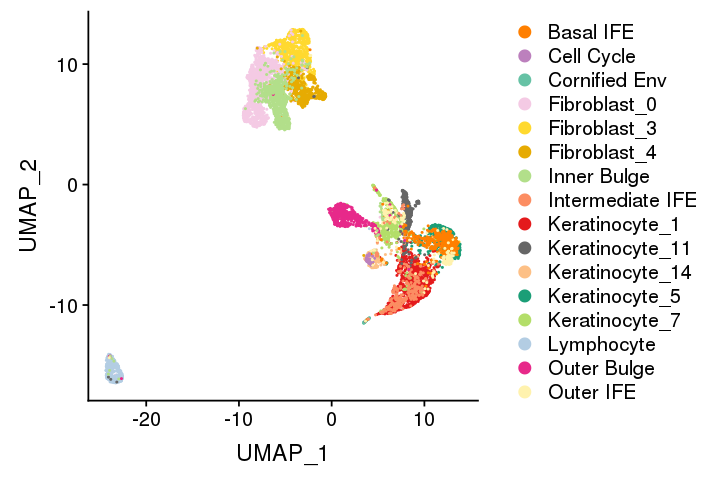

In [919]:
options(repr.plot.width = 6, repr.plot.height = 4)
DimPlot(integrated.epidermis, group.by = "free_annotation", cols = paste(col_vector, "", sep = ""), label = F)

# Compare mouse and human scRNA-seq

In [1]:
load("../data/Robjs/human_skin_seurat.Robj", verbose = TRUE)
human_skin = tiss

Loading objects:
  tiss


In [3]:
load("../data/Robjs/human_epidermis_seurat.Robj", verbose = TRUE)
human_final_robj = tiss

Loading objects:
  tiss


In [5]:
load("../data/Robjs/mouse_skinreannotated_seurat.Robj", verbose = TRUE)
mouse_final_robj = tiss

Loading objects:
  tiss


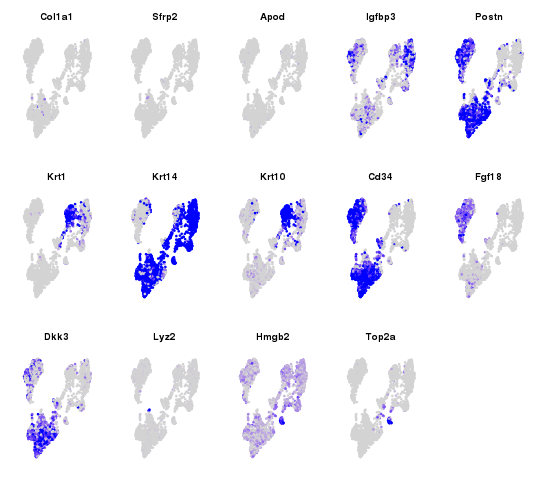

In [12]:
# Mouse expression of marker genes
options(repr.plot.width = 4.5, repr.plot.height = 4)
p <- FeaturePlot(mouse_final_robj, features = c(
                                                "Col1a1", #fibroblasts
                                                "Sfrp2", #fibroblasts
                                                "Apod", #fibroblasts
                                                "Igfbp3", #fibroblasts
                                                "Postn", #fibroblasts
    
                                                "Krt1", #keratinocytes
                                                "Krt14", #basal
                                                "Krt10", # epidermal
    
                                                "Cd34", #bulge cells
                                                "Fgf18",#inner
                                                "Dkk3", #outer

                                                "Lyz2", #leukocytes

                                                "Hmgb2", #epidermal (broad)
                                                "Top2a" #cell cycle (stem cell?)                                               
                                                ), 

                 pt.size = .1, min.cutoff = 0, max.cutoff = 2.5, combine = FALSE) 





for(i in 1:length(p)) {
  p[[i]] <- p[[i]] + NoLegend() + FontSize(main = 6) + NoAxes() 
}

cowplot::plot_grid(plotlist = p, ncol = 5)

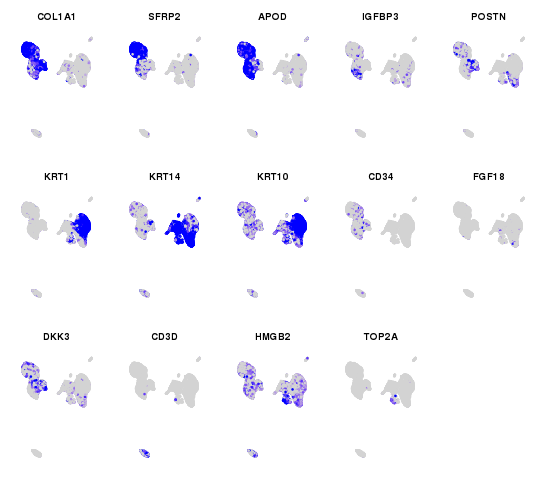

In [11]:
options(repr.plot.width = 4.5, repr.plot.height = 4)

p <- FeaturePlot(human_final_robj, features = c(
                                                "COL1A1", #fibroblasts
                                                "SFRP2", #fibroblasts
                                                "APOD", #fibroblasts
                                                "IGFBP3", #fibroblasts
                                                "POSTN", #fibroblasts
    
                                                "KRT1", #keratinocytes
                                                "KRT14", #basal
                                                "KRT10", # epidermal
    
                                                "CD34", #bulge cells
                                                "FGF18",#inner
                                                "DKK3", #outer
    
                                                "CD3D", #leukocytes

                                                "HMGB2", #stem cell
                                                "TOP2A" #cell cycle (stem cell?)
                                                  ),
            pt.size = .1, min.cutoff = 0, max.cutoff = 2.5, combine = FALSE)

for(i in 1:length(p)) {

    p[[i]] <- p[[i]] + NoLegend() + FontSize(main = 6) + NoAxes() 

}

cowplot::plot_grid(plotlist = p, ncol = 5)

In [13]:
human_cols <- c("#e33b6b", "#b5c200", "#edb02b", "#b04e09", "#09006b", "#366573", "#11bab2", "#75c1ff", "#3ead2f")
mouse_cols <- c("#a3a737", "#34ade3", "#b9a5cf", "#ef68a2", "#663d94", "orange")

In [14]:
human_skin_cols <- c("grey", "#e33b6b", "grey", "#b5c200", "#edb02b", "#b04e09", "#09006b", "#366573", "#11bab2", "#75c1ff", "#366573", "#3ead2f",
                    "grey", "grey", "grey", "grey", "grey", "grey", "grey")

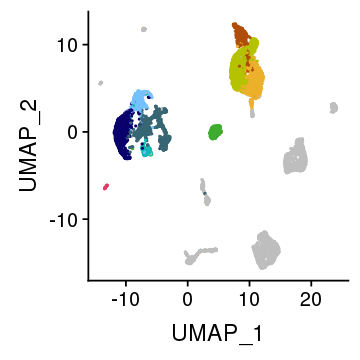

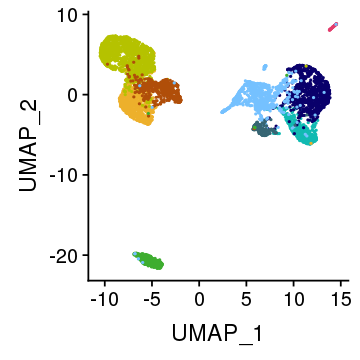

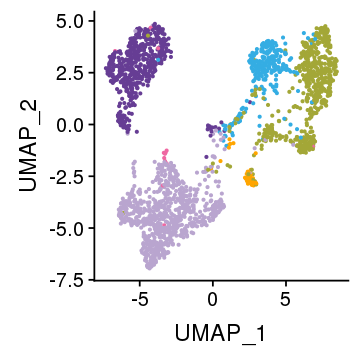

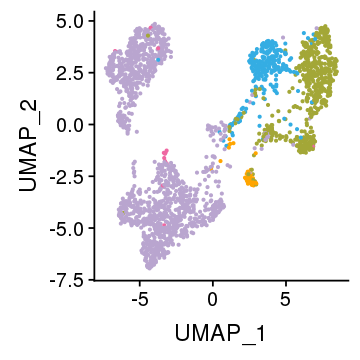

In [16]:
options(repr.plot.width = 3, repr.plot.height = 3)

DimPlot(human_skin, reduction = "umap", group.by = "celltype_cluster", label = F, pt.size = .25, cols = human_skin_cols) + NoLegend()
DimPlot(human_final_robj, reduction = "umap", group.by = "final_annotation", label = F, pt.size = .25, cols = human_cols) + NoLegend()

DimPlot(mouse_final_robj, group.by = "final_annotation", pt.size = .5, cols = mouse_cols) + NoLegend()
DimPlot(mouse_final_robj, group.by = "cell_ontology_class", pt.size = .5, cols = mouse_cols[c(1, 2, 3, 4, 6)]) + NoLegend()


In [17]:
PlotBarplotFrazer <- function(tiss, colors){
    
    par(mar = c(10, 5, 1, .5))
    counts = as.data.frame(table(tiss@meta.data$final_annotation))

    counts$fraction = (counts$Freq / sum(counts$Freq)) * 100
    counts = counts[order(counts$Var1),]
    counts$color <- colors
    counts = counts[order(counts$fraction),]
    



    barplot(counts$fraction, horiz = F, xlim = c(0, 60), names.arg = counts$Var1, las = 2, col = counts$color,
            border=NA, width = 3, ylab = "Fraction of cells")
    
    
}

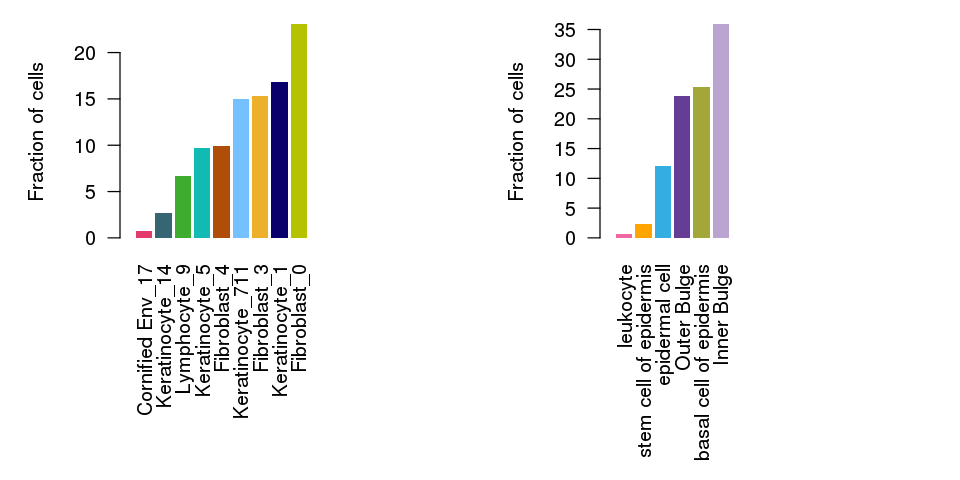

In [1609]:
options(repr.plot.width = 8, repr.plot.height = 4)


# pdf("./skin_cell_barplot.pdf", width = 8, height = 4)
par(mfrow = c(1,2))
PlotBarplotFrazer(human_final_robj, human_cols)
PlotBarplotFrazer(mouse_final_robj, mouse_cols)
# dev.off()

In [1383]:
mouse_colors = data.frame(celltypes = c('basal.cell.of.epidermis', 'epidermal.cell', 'Inner.Bulge',
                                       'leukocyte', 'Outer.Bulge', 'stem.cell.of.epidermis'),
                          colors =     mouse_cols)
               
human_colors = data.frame(celltypes = c('Cornified.Env_17', "Fibroblast_0", "Fibroblast_3",
                                       "Fibroblast_4", "Keratinocyte_1",
                                       "Keratinocyte_14", "Keratinocyte_5", "Keratinocyte_7_11",
                                       "Lymphocyte_9"),
                          colors =     human_cols)

In [1767]:
mouse_estimates = read.csv("./CIBERSORT_mouse_reannotated.csv")
human_estimates = read.csv("./CIBERSORT_human_epidermis.csv")

In [1776]:
mouse_order = mouse_estimates[order(-mouse_estimates$stem.cell.of.epidermis), "X"]

human_order = human_estimates[order(-human_estimates$Keratinocyte_14, -human_estimates$Keratinocyte_1), "X"]

In [1778]:
CiberBarFrazer <- function(ciber, colors, main0, ordered, legy, species){
    
    rownames(ciber) <- ciber$X
    ciber$X <- NULL
    ciber = ciber[, seq(1, (ncol(ciber) - 3))]
    ciber = ciber[ordered,]
    nsamples = nrow(ciber)
    ciber = as.data.frame(t(ciber) * 100)


    
    if( species == "human"){

#         rownames(ciber)  = factor(rownames(ciber), levels=c("Cornified.Env_17", "Keratinocyte_7_11", "Keratinocyte_1", "Keratinocyte_14", "Keratinocyte_5",
#                                      "Fibroblast_3", "Fibroblast_0", "Fibroblast_4",
#                                       "Lymphocyte_9"))
    
        ciber = ciber[c("Keratinocyte_14","Keratinocyte_1", "Keratinocyte_7_11",  "Keratinocyte_5",
                                     "Fibroblast_3", "Fibroblast_0", "Fibroblast_4",
                                      "Lymphocyte_9", "Cornified.Env_17"), ]
        ciber = ciber[,ordered]

    }
    
    if( species == "mouse"){
    
        ciber = ciber[rev(c("basal.cell.of.epidermis", "Outer.Bulge", "Inner.Bulge", "leukocyte",
                                     "epidermal.cell", "stem.cell.of.epidermis")), ]
        ciber = ciber[,ordered]

    }
    
    ciber$color = colors[ match(rownames(ciber), colors$celltypes),  "colors"]

    barplot(as.matrix(ciber[, seq(1, (ncol(ciber) - 1))]), las = 2, col = ciber$color, border=NA, names.arg = rep("", ncol(ciber) - 1), 
           ylab = "Fraction clusters", main = main0)

    text(nsamples * .05, legy + 3, paste("n = ", nsamples, sep = ""), pos = 4)

    legend(nsamples * .05, legy, gsub("_", " ", colors$celltypes), bty = "n",
           pch = rep(22, nrow(colors)),
           pt.cex = rep(1.5, nrow(colors)),
           pt.bg = colors$colors )
    

    
}





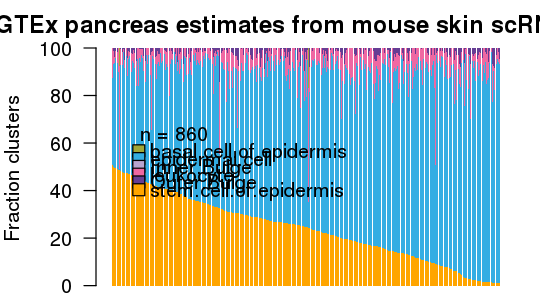

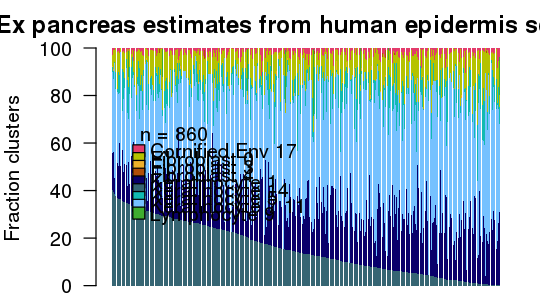

In [1784]:
options(repr.plot.width = 4.5, repr.plot.height = 2.5)
# pdf("./pidermis_cellular_estimates_barplot.pdf", height = 2.5, width = 4.5)
par(mar = c(0.5, 4, 2, 1))

CiberBarFrazer(mouse_estimates, mouse_colors, "GTEx pancreas estimates from mouse skin scRNA-seq", mouse_order, 60, "mouse")
CiberBarFrazer(human_estimates, human_colors, "GTEx pancreas estimates from human epidermis scRNA-seq", human_order, 60, "human")

# dev.off()

In [1557]:
CorSpeciesFrazer <- function(human, mouse){
    
    rownames(human) <- human$X
    human$X <- NULL
    colnames(human) <- paste(colnames(human), "human", sep = "_")
    
    rownames(mouse) <- mouse$X
    mouse$X <- NULL
    colnames(mouse) <- paste(colnames(mouse), "mouse", sep = "_")
    
    m <- cbind(human, mouse)
    m$Lymphocyte_human <- NULL
    
    return(m)
}

In [1734]:
HeatmapSpeciesFrazer <- function(human, mouse){
    
    m = CorSpeciesFrazer(human, mouse)
    res1 <- cor.mtest(m)
    m <- cor(m)

    rownames(res1$p) <- rownames(m)
    colnames(res1$p) <- colnames(m)

    m <- m[  grep("mouse", rownames(m)),]
    m <- m[, grep("human", colnames(m)) ]
    res1$p <- res1$p[  grep("mouse", rownames(res1$p)),]
    res1$p <- res1$p[, grep("human", colnames(res1$p)) ]
    
    rownames(m) = str_split_fixed(rownames(m), "_mouse", 2)[,1]
    colnames(m) = str_split_fixed(colnames(m), "_human", 2)[,1]

    
    rownames(m) = gsub("_", " ", rownames(m))
    colnames(m) = gsub("_", " ", colnames(m))
    
    
    corrplot(m, method = "color", cl.ratio = 0.5, p.mat = res1$p, sig.level = c(10e-100, 10e-50, 10e-20), pch.cex = 1.25, insig = "label_sig", pch.col = "white", cl.pos = "n")#,
    
    return(m)
    
}

In [2]:
HeatmapSpeciesFrazer(human_estimates[,     !colnames(human_estimates) %in% c("P.value", "Pearson.Correlation", "RMSE")],
                     mouse_estimates[,     !colnames(mouse_estimates) %in% c("P.value", "Pearson.Correlation", "RMSE")])

In [3]:
options(repr.plot.width = 10, repr.plot.height =5)

par(mfrow = c(1,2))
plot(human_estimates_cor$Keratinocyte_14, mouse_estimates$stem.cell.of.epidermis, pch = 19, las = 2)
lines(c(0:1), c(0:1))
cor(human_estimates_cor$Keratinocyte_14, mouse_estimates$stem.cell.of.epidermis)

plot(human_estimates_cor$collapsed_epidermal, mouse_estimates$collapsed_epidermal, pch = 19, las = 2, xlim = c(0,1))
lines(c(0:1), c(0:1))
cor(human_estimates_cor$collapsed_epidermal, mouse_estimates$collapsed_epidermal)